# Recursive Approach.

In [1]:
# libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date

In [2]:
objects = ['AAPL',
           'CL=F']

In [3]:
df = web.DataReader(objects[1], data_source='yahoo', start='2012-01-01', end=date.today())

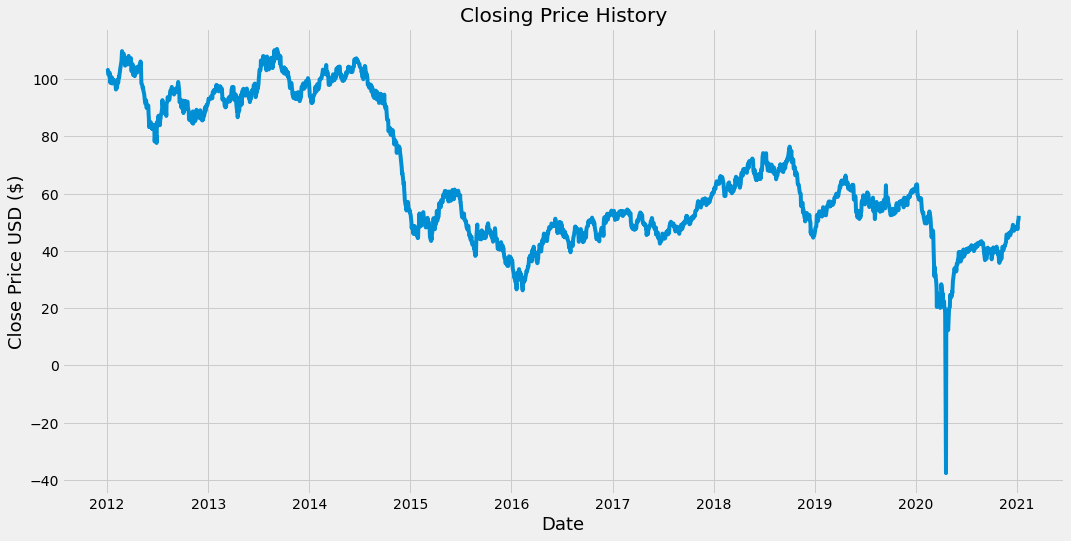

In [4]:
# visualization of closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
testing_len = 10
training_len = len(dataset) - testing_len
periods = [5,10,20,30]
period = 5

In [7]:
training_data = scaled_data[ : training_len , : ]
x_train = []
y_train = []
for i in range(period,len(training_data)):
  x_train.append(training_data[i-period : i , 0])
  y_train.append(training_data[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(2234, 5)
(2234, 5, 1)


In [8]:
layers = [1,2,3,4]
neurons = [10,20,30,40,50,60]
neurons_num = 60
dropouts = [0.0,0.1,0.2,0.3,0.4,0.5]
dropout = dropouts[5]

In [9]:
# train.
model = Sequential()
model.add(LSTM(neurons_num, input_shape=(x_train.shape[1],1)))
model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=15)

Epoch 1/15
2234/2234 [==============================] - 5s 1ms/step - loss: 0.0287
Epoch 2/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 3/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0024
Epoch 4/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0015
Epoch 5/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 6/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 7/15
2234/2234 [==============================] - 3s 1ms/step - loss: 8.7920e-04
Epoch 8/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 9/15
2234/2234 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 10/15
2234/2234 [==============================] - 3s 1ms/step - loss: 9.3149e-04
Epoch 11/15
2234/2234 [==============================] - 3s 1ms/step - loss: 9.1110e-04
Epoch 12/15
2234/2234 [==============================] - 3s 1ms/step - lo

In [42]:
training_data

array([[0.94890659],
       [0.95066146],
       [0.9411447 ],
       ...,
       [0.58538067],
       [0.57620142],
       [0.5713418 ]])

In [62]:
# predict.
predictions = []
copy = training_data
for i in range(testing_len):
    use = copy[len(copy)-period : ]
    use = np.reshape(use,(1,len(use),1))
    prediction = model.predict(use)
    copy = np.append(copy,prediction)
    predictions = np.append(predictions,prediction)
predictions = scaler.inverse_transform(np.reshape(predictions,(len(predictions),1)))
train = data[ : training_len]
valid = data[training_len : ]
valid['Predictions'] = predictions

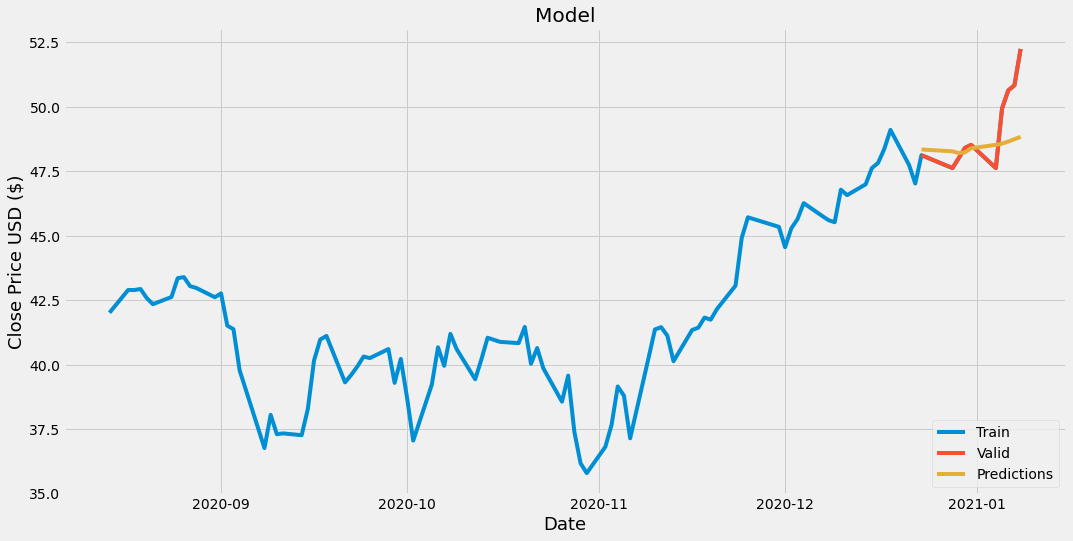

0.7175744790880799

In [71]:
# plot.
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data[len(data)-100 : ])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()
rmse = np.sqrt(np.mean(predictions - dataset[len(dataset)-testing_len : ])**2)
rmse